<a href="https://colab.research.google.com/github/SoIllEconomist/ds4b/blob/master/python_ds4b/02_wrangle/03_tidy_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tidy Data
## Introduction

In this chapter, you will learn a consistent way to organise your data in Python, an organisation called **tidy data**. Getting your data into this format requires some upfront work, but that work pays off in the long term. Once you have tidy data and the tidy tools provided by `pandas`, you will spend much less time munging data from one representation to another, allowing you to spend more time on the analytic questions at hand.

This chapter will give you a practical introduction to tidy data and the accompanying tools in `pandas`. If you’d like to learn more about the underlying theory, you might enjoy the Tidy Data paper published in the Journal of Statistical Software, http://www.jstatsoft.org/v59/i10/paper.

### Prerequisties

In this chapter we'll focus on `pandas`, a package that provides tools to help tidy up your messy datasets. 

In [0]:
import pandas as pd

You can represent the same underlying data in multiple ways. The example below shows the same data organised in four different ways. Each dataset shows the same values of four variables country, year, population, and cases, but each dataset organises the values in a different way.

**Table 1**

| country     | year  | cases  | population |
|-------------|-------|--------|------------|
| Afghanistan | 1999  | 745    | 19987071   |
| Afghanistan | 2000  | 2666   | 20595360   |
| Brazil      | 1999  | 37737  | 172006362  |
| Brazil      | 2000  | 80488  | 174504898  |
| China       | 1999  | 212258 | 1272915272 |
| China       | 2000  | 213766 | 1280428583 |

**Table 2**

| country     | year | type       | count     |
|-------------|------|------------|-----------|
| Afghanistan | 1999 | cases      | 745       |
| Afghanistan | 1999 | population | 19987071  |
| Afghanistan | 2000 | cases      | 2666      |
| Afghanistan | 2000 | population | 20595360  |
| Brazil      | 1999 | cases      | 37737     |
| Brazil      | 1999 | population | 172006362 |

**Table 3**

| country     | year | rate              |
|-------------|------|-------------------|
| Afghanistan | 1999 | 745/19987071      |
| Afghanistan | 2000 | 2666/20595360     |
| Brazil      | 1999 | 37737/172006362   |
| Brazil      | 2000 | 80488/174504898   |
| China       | 1999 | 212258/1272915272 |
| China       | 2000 | 213766/1280428583 |

Data Spread accross two tables.

**Table 4a: Cases**

| country     | 1999   | 2000   |
|-------------|--------|--------|
| Afghanistan | 745    | 2666   |
| Brazil      | 37737  | 80488  |
| China       | 212258 | 213766 |

**Table 4b: Population**

| country     | 1999       | 2000       |
|-------------|------------|------------|
| Afghanistan | 19987071   | 20595360   |
| Brazil      | 172006362  | 174504898  |
| China       | 1272915272 | 1280428583 |

These are all representations of the same underlying data, but they are not equally easy to use. One dataset, the tidy dataset, will be much easier to work with inside the tidyverse.

There are three interrelated rules which make a dataset tidy:

1. Each variable must have its own column.
1. Each observation must have its own row.
1. Each value must have its own cell.

**Visual Representation of the rules**

![Following three rules makes a dataset tidy: variables are in columns, observations are in rows, and values are in cells.](tidy-1.png)

These three rules are interrelated because it’s impossible to only satisfy two of the three. That interrelationship leads to an even simpler set of practical instructions:

1. Put each dataset in a DataFrame.
1. Put each variable in a column.

In this example, only **Table 1** is tidy. It’s the only representation where each column is a variable.

*Why ensure that your data is tidy?* There are two main advantages:

1. There’s a general advantage to picking one consistent way of storing data. If you have a consistent data structure, it’s easier to learn the tools that work with it because they have an underlying uniformity.

1. There’s a specific advantage to placing variables in columns because it allows `pandas`’s vectorised nature to shine. As you learned, most built-in `pandas` functions work with vectors of values. That makes transforming tidy data feel particularly natural.

!ll the other functions/methods in `pandas` are designed to work with tidy data. Here are a couple of small examples showing how you might work with


In [0]:
from io import StringIO
table1 = StringIO("""country     | year  | cases  | population
Afghanistan | 1999  | 745    | 19987071
Afghanistan | 2000  | 2666   | 20595360
Brazil      | 1999  | 37737  | 172006362
Brazil      | 2000  | 80488  | 174504898
China       | 1999  | 212258 | 1272915272
China       | 2000  | 213766 | 1280428583""")

table1 = pd.read_csv(table1, sep="|", )

In [0]:
table1.columns = table1.columns.str.strip()

Compute rate per 10,000

In [14]:
table1.assign(rate = lambda x: x["cases"] / x["population"] * 10000)

,country,year,cases,population,rate
0,Afghanistan,1999,745,19987071,0.372741
1,Afghanistan,2000,2666,20595360,1.294466
2,Brazil,1999,37737,172006362,2.193930
3,Brazil,2000,80488,174504898,4.612363
4,China,1999,212258,1272915272,1.667495
5,China,2000,213766,1280428583,1.669488


Compute cases per year

In [20]:
table1.groupby('year')['cases'].count()

year
1999    3
2000    3
Name: cases, dtype: int64

Visualise changes over time

In [0]:
import seaborn as sns

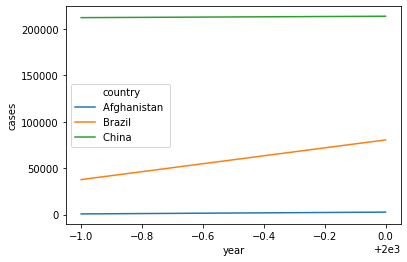

In [30]:
sns.lineplot(x='year',y='cases',hue='country',data=table1);

### Exercises
1. Using prose, describe how the variables and observations are organised in each of the sample tables.

1. Compute the rate for table2, and table4a + table4b. You will need to perform four operations:

  1. Extract the number of TB cases per country per year.
  1. Extract the matching population per country per year.
  1. Divide cases by population, and multiply by 10000.
  1. Store back in the appropriate place.
Which representation is easiest to work with? Which is hardest? Why?

1. Recreate the plot showing change in cases over time using table2 instead of table1. What do you need to do first?

## Spreading and gathering

The principles of tidy data seem so obvious that you might wonder if you’ll ever encounter a dataset that isn’t tidy. Unfortunately, however, most data that you will encounter will be untidy. There are two main reasons:

1. Most people aren’t familiar with the principles of tidy data, and it’s hard to derive them yourself unless you spend a lot of time working with data.

1. Data is often organised to facilitate some use other than analysis. For example, data is often organised to make entry as easy as possible.

This means for most real analyses, you’ll need to do some tidying. The first step is always to figure out what the variables and observations are. Sometimes this is easy; other times you’ll need to consult with the people who originally generated the data. The second step is to resolve one of two common problems:

1. One variable might be spread across multiple columns.

1. One observation might be scattered across multiple rows.

Typically a dataset will only suffer from one of these problems; it’ll only suffer from both if you’re really unlucky! To fix these problems, you’ll need the two most important functions in `pandas`: `melt()` and `pivot_table()`.

### Melt (Gathering)
A common problem is a dataset where some of the column names are not names of variables, but *values* of a variable. Take `table4a`: the column names *1999* and *2000* represent values of the year variable, and each row represents two observations, not one. E.g., we are unpivoting a DataFrame from wide format to long format, optionally leaving identifier variables set.

This function is useful to massage a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.

In [0]:
table4a = StringIO("""country|1999|2000
Afghanistan | 745    | 2666   
Brazil      | 37737  | 80488  
China       | 212258 | 213766 
""")
table4a = pd.read_csv(table4a, sep="|")

In [32]:
table4a

,country,1999,2000
0,Afghanistan,745,2666
1,Brazil,37737,80488
2,China,212258,213766


To tidy a dataset like this, we need to **melt** (gather) those columns into a new pair of variables. To describe that operation we need three parameters:

- The set of columns that represent values, not variables. In this example, those are the columns 1999 and 2000.

- The name of the identifier variable(s) is the `id_vars`, and here it is `country`. 

- The name of the variable whose values form the column names. We call that the `var_name`, and here it is `year`.

- The name of the variable whose values are spread over the cells. We call that `value_name`, and here it’s the number of `cases`.

Together those parameters generate the call to `pd.melt()`

In [37]:
pd.melt(table4a,
        id_vars=["country"],
        value_vars=["1999","2000"],
        var_name = "year",
        value_name="cases"
        )

,country,year,cases
0,Afghanistan,1999,745
1,Brazil,1999,37737
2,China,1999,212258
3,Afghanistan,2000,2666
4,Brazil,2000,80488
5,China,2000,213766


Here there are only two columns, so we list them individually. Note that “1999” and “2000” are non-syntactic names (because they don’t start with a letter) so we have to surround them in backticks. To refresh your memory of the other ways to select columns. 

![Gathering table4 into a tidy form.](tidy-9.png)

